### 1 Least squares is MLE

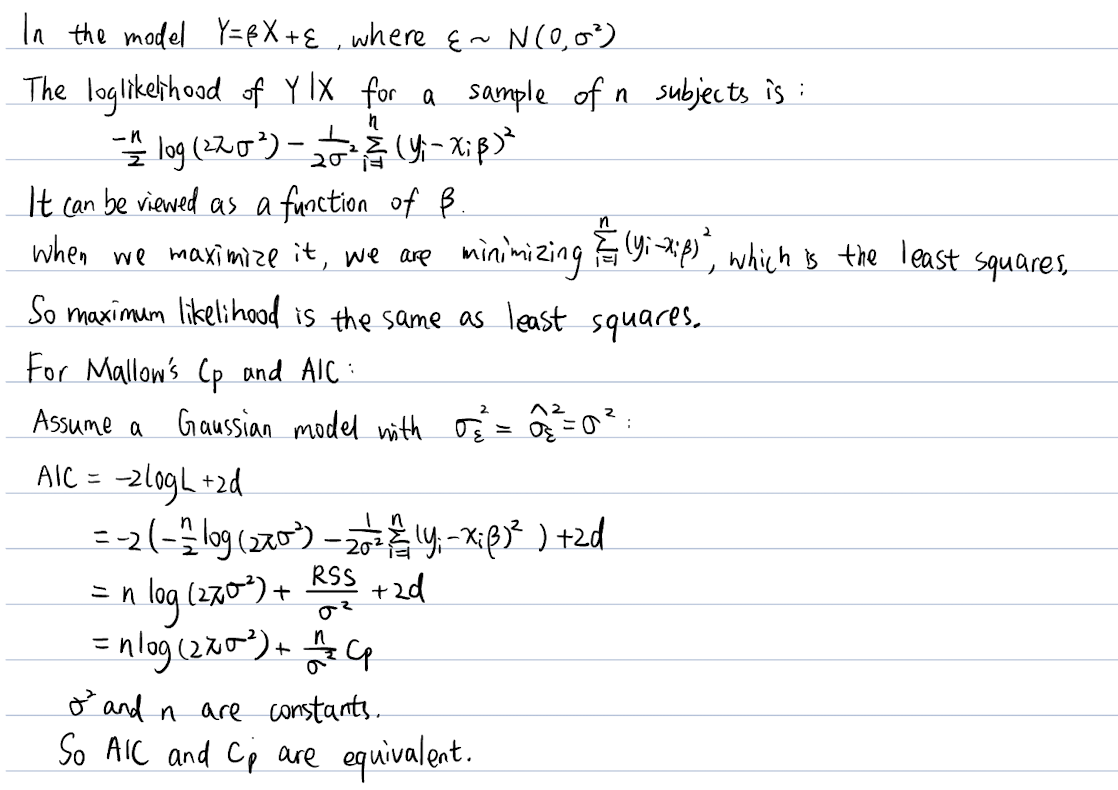

### 2 ISL Exercise 6.6.1 (10pts)

(a) Best subset selection has the smallest training RSS because the other two methods determine models with a path dependency on which predictors they pick first as they iterate to the best model, and the best subset selection is the one selected among all k predictors models.

(b) Best subset selection may have the smallest test RSS because it takes into account more models than the other methods. However, the other methods might also possibly pick a model with smaller test RSS.

(c)
i. True. The model with (k+1) predictors is obtained by augmenting the predictors in the model with k predictors with one additional predictor.

ii. True. The model with k predictors is obtained by removing one predictor from the model with (k+1) predictors.

iii. False. There is no direct connection between them.

iv. False. There is no direct connection between them.

v. False. The model with (k+1) predictors is obtained by selecting among all possible models with (k+1) predictors, and it does not necessarily contain all the predictors selected for the k-variable model.

### 3 ISL Exercise 6.6.3 (10pts)

(a) Steadily decrease. As we increase s from 0, we are restricting the βj coefficients less, and the coefficients will increase to their least squares estimates, and so the model is becoming more flexible, which causes a steady decrease in the training RSS.

(b) Decrease initially, and then eventually start increasing in a U shape. As we increase s from 0, we are restricting the βj coefficients less, and the coefficients will increase to their least squares estimates, and so the model is becoming more flexible, which causes an initial decrease in the test RSS and then increasing in a typical U shape.

(c) Steadily increase. As we increase s from 0, we are restricting the βj coefficients less, and the coefficients will increase to their least squares estimates, and so the model is becoming more flexible, which causes a steady increase in variance.

(d) Steadily decrease. As we increase s from 0, we are restricting the βj coefficients less, and the coefficients will increase to their least squares estimates, and so the model is becoming more flexible, which causes a steady decrease in squared bias.

(e) Remain constant. The irreducible error is independant of the model, and so independant of the value of s.

### 4 ISL Exercise 6.6.4 (10pts)

(a) Steadily increase. As we increase λ from 0, we are restricting the βj coefficients more, and the coefficients will deviate from their least squares estimates, and so the model is becoming less flexible, which causes a steady increase in training RSS.

(b) Decrease initially, and then eventually start increasing in a U shape. As we increase λ from 0, we are restricting the βj coefficients more, and the coefficients will deviate from their least squares estimates, and so the model is becoming less flexible, which causes an initial decrease in the test RSS and then increasing in a typical U shape.

(c) Steadily decrease. As we increase λ from 0, we are restricting the βj coefficients more, and the coefficients will deviate from their least squares estimates, and so the model is becoming less flexible, which causes a steady decrease in variance.

(d) Steadily increase. As we increase λ from 0, we are restricting the βj coefficients more, and the coefficients will deviate from their least squares estimates, and so the model is becoming less flexible, which causes a steady increase in squared bias.

(e) Remain constant. The irreducible error is independant of the model, and so independant of the value of λ.

### 5 ISL Exercise 6.6.5 (10pts)

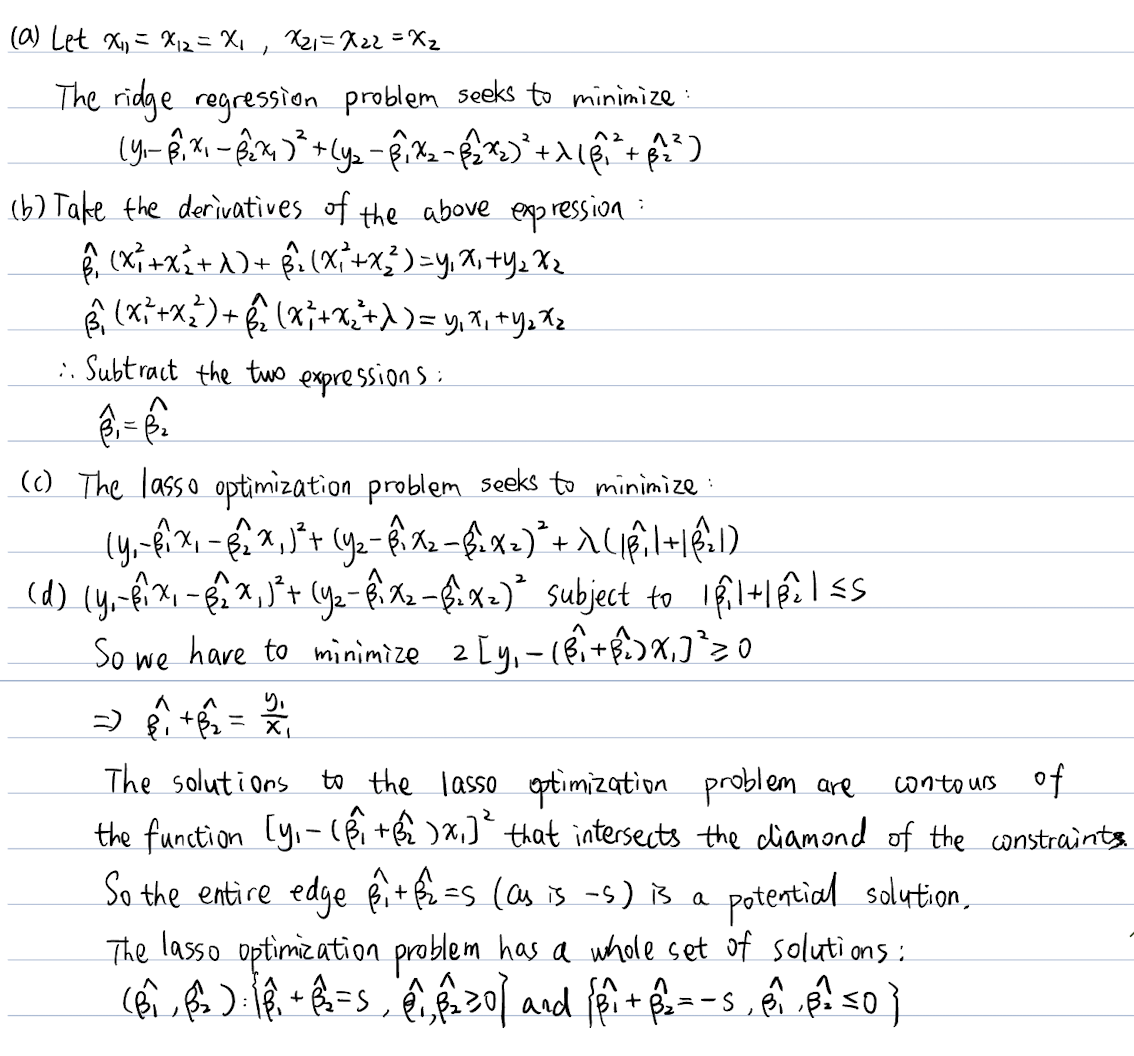

### 6 ISL Exercise 6.6.11 (30pts)

In [1]:
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
Boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [2]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [3]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
Boston.dropna(inplace = True)
Boston.shape

(506, 13)

In [5]:
from sklearn.model_selection import train_test_split

Boston_other, Boston_test = train_test_split(
  Boston, 
  train_size = 0.75,
  random_state = 425, # seed
  )
Boston_test.shape

(127, 13)

In [6]:
Boston_other.shape

(379, 13)

In [7]:
from sklearn import preprocessing

# Non-test X and y
X_other = Boston_other.drop('crim', axis = 1)
# Encode dummy variable
X_other = preprocessing.OrdinalEncoder().fit_transform(X_other)
y_other = Boston_other.crim
# Test X and y
X_test = Boston_test.drop('crim', axis = 1)
# Encode dummy variable
X_test = preprocessing.OrdinalEncoder().fit_transform(X_test)
y_test = Boston_test.crim

In [8]:
scalar = preprocessing.StandardScaler()

In [9]:
#least square
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_other, y_other)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
# cv
cv_linear = cross_val_score(estimator = regressor_linear, X = X_other, y = y_other,
                            scoring="neg_root_mean_squared_error", cv = 10)

y_pred_linear_test = regressor_linear.predict(X_test)
# RMSE
rmse_linear=mean_squared_error(y_test, y_pred_linear_test, squared = False)

print("CV RMSE: ", -cv_linear.mean())

print("Test RMSE: ", rmse_linear)

CV RMSE:  6.73289354782639
Test RMSE:  18.025249211945958


In [11]:
#Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 10000)

In [12]:
# Tune hyper-parameter(s)
alphas = np.logspace(start = -3, stop = 0, base = 10, num = 100)
tuned_parameters = {"model__alpha": alphas}

In [13]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [("scalar", scalar), ("model", lasso)])

from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 10
search = GridSearchCV(
  pipe, 
  tuned_parameters, 
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True 
  )


In [14]:
# Fit CV
search.fit(X_other, y_other)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('model', Lasso(max_iter=10000))]),
             param_grid={'model__alpha': array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.003...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ])},
             scoring='neg_root_mean_squared_error')

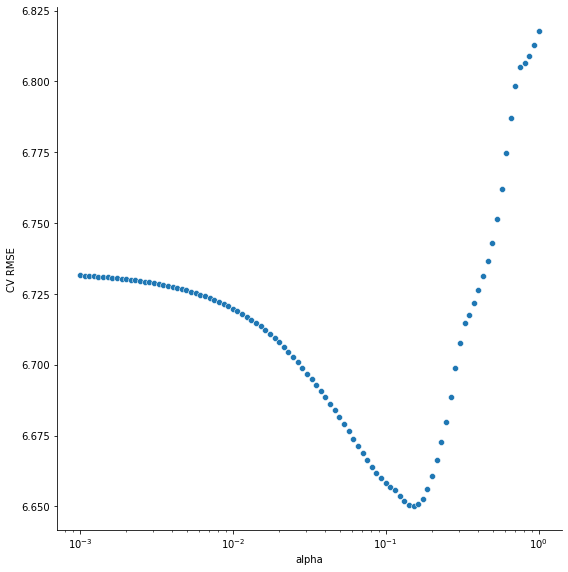

In [15]:
import seaborn as sns
cv_res = pd.DataFrame({
  "alpha": alphas,
  "rmse": -search.cv_results_["mean_test_score"]
  })

  
sns.relplot(
  data = cv_res,
  x = "alpha",
  y = "rmse",
  height = 8
  ).set(
    xlabel = "alpha",
    ylabel = "CV RMSE",
    xscale = "log"
)

In [16]:
cv_lasso_best=-search.best_score_

In [17]:
from sklearn.metrics import mean_squared_error

rmse_lasso=mean_squared_error(y_test, search.best_estimator_.predict(X_test), squared = False)

print("CV RMSE: ", cv_lasso_best)

print("Test RMSE: ", rmse_lasso)

CV RMSE:  6.650072294447499
Test RMSE:  11.560482283082557


In [18]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(max_iter = 10000)

In [19]:
# Tune hyper-parameter(s)
alphas2 = np.logspace(start = -3, stop = 2, base = 10, num = 100)
tuned_parameters2 = {"model__alpha": alphas2}

In [20]:
from sklearn.preprocessing import PolynomialFeatures
pipe2 = Pipeline(steps = [("scalar", scalar),("model", ridge)])

# Set up CV
n_folds = 10
search2 = GridSearchCV(
  pipe2, 
  tuned_parameters2, 
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True 
  )

In [21]:
# Fit CV
search2.fit(X_other, y_other)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('model', Ridge(max_iter=10000))]),
             param_grid={'model__alpha': array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03...
       6.89261210e+00, 7.74263683e+00, 8.69749003e+00, 9.77009957e+00,
       1.09749877e+01, 1.23284674e+01, 1.38488637e+01, 1.55567614e+01,
       1.74752840e+01, 1.96304065e+01, 2.20513074e+01, 2.47707636e+01,
       2.78255940e+01, 3.12571585e+01, 3.51119173e+01, 3.94420606e+01,
       4.43062146e+01, 4.97702356e+01, 5.59081018e+01, 6.28029144e+01,
       7.05480231e+01, 7.92482898e+01, 8.90215085e+01, 1.00000000e+02])},
             scoring='neg_root_mean_squared_error')

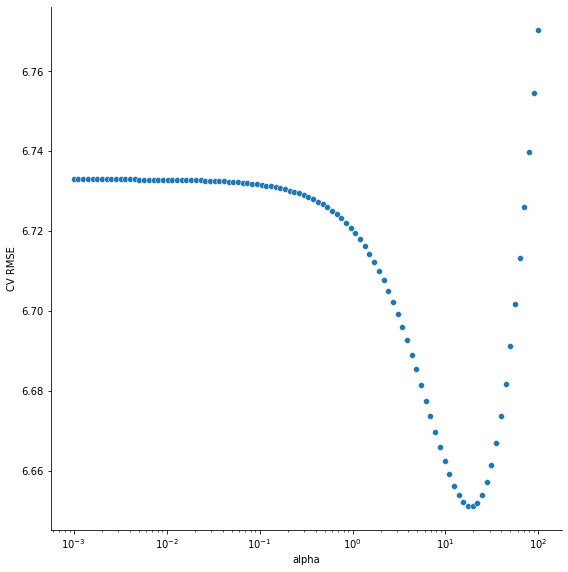

In [22]:
cv_res2 = pd.DataFrame({
  "alpha": alphas2,
  "rmse": -search2.cv_results_["mean_test_score"]
  })

  
sns.relplot(
  data = cv_res2,
  x = "alpha",
  y = "rmse",
  height = 8
  ).set(
    xlabel = "alpha",
    ylabel = "CV RMSE",
    xscale = "log"
)

In [23]:
cv_ridge_best=-search2.best_score_

In [24]:
rmse_ridge=mean_squared_error(y_test, search2.best_estimator_.predict(X_test), squared = False)

print("CV RMSE: ", cv_ridge_best)

print("Test RMSE: ", rmse_ridge)

CV RMSE:  6.651066418915721
Test RMSE:  12.045052045142857


In [25]:
#(a)
from prettytable import PrettyTable
table = PrettyTable(['Method', 'CV RMSE', 'Test RMSE'])
 
table.add_row(['LS', -cv_linear.mean(), rmse_linear])
table.add_row(['Lasso', cv_lasso_best, rmse_lasso])
table.add_row(['Ridge', cv_ridge_best, rmse_ridge])
 
print(table)

+--------+-------------------+--------------------+
| Method |      CV RMSE      |     Test RMSE      |
+--------+-------------------+--------------------+
|   LS   |  6.73289354782639 | 18.025249211945958 |
| Lasso  | 6.650072294447499 | 11.560482283082557 |
| Ridge  | 6.651066418915721 | 12.045052045142857 |
+--------+-------------------+--------------------+


(b) It seems that the Lasso method is the best since it has the smallest CV RMSE and Test RMSE.

In [26]:
#(c)
cv_res.sort_values(by=['rmse'],ascending=False)

,alpha,rmse
99,1.000000,6.817759
98,0.932603,6.812670
97,0.869749,6.809004
96,0.811131,6.806521
95,0.756463,6.805013
...,...,...
74,0.174753,6.652709
70,0.132194,6.651758
73,0.162975,6.650760
71,0.141747,6.650387


In [27]:
a=cv_res.sort_values(by=['rmse'],ascending=False).iloc[99,0]

In [28]:
lasso=Lasso(alpha=a,max_iter = 10000)
lasso.fit(X_other,y_other).coef_

array([ 0.06433358, -0.05008463, -0.        , -0.15060565,  0.00765117,
       -0.006748  , -0.06662322,  1.56093658, -0.05516041,  0.01552149,
       -0.013499  , -0.09718679])

The chosen model does not involve all of the features in the data set, because Lasso regression could generally select models that involve just a subset of the variable, which would increase accuracy.

### 7 ISL Exercise 5.4.2 (10pts)

(a) (n-1)/n. The probability that the first bootstrap observation is the jth observation is 1/n, so the probability that the first bootstrap observation is not the jth observation is (n-1)/n.

(b) (n-1)/n. It is same as above.

(c) In bootstrapping, we obtain the data by repeatedly sampling observation from original data set n times. The sampling is performed with replacement, which means that the same observation can occur more than once in the bootstrap data set. Thus, the probability that the jth observation is not in the bootstrap sample is (n-1)/n*(n-1)/n*……* (n-1)/n = [(n-1)/n]^n =(1-1/n)^n

(d) 1-(1-1/5)^5=0.67232

(e) 1-(1-1/100)^100=0.633968

(f) 1-(1-1/10000)^10000=0.632139

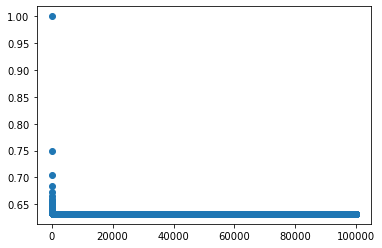

In [29]:
#(g)
import matplotlib.pyplot as plt
x = [n for n in range(1,100001)]
y = [(1-(1-1/n)**n) for n in range(1,100001)]
d=pd.DataFrame()
d['x']=x
d['y']=y
plt.scatter(d.x,d.y)

We can see that the probability that the jth observation is in the bootstrap sample converges. (to 1-1/e)

In [30]:
#(h)
store = []
lst=[x for x in range(1,101)]
e=pd.DataFrame()
e['x']=lst
for i in range(1,100001):
    store.append(sum((e.sample(n=100, replace=True) == 4).astype(int)['x']) > 0)
store.count(True)/100000

0.63454

The answer is 0.63388, which is very close to our theroretical value.

### 8 ISL Exercise 5.4.9 (20pts)

In [31]:
#(a)
miu=Boston.medv.mean()
miu

22.532806324110698

In [32]:
#(b)
estimated_sd=np.std(Boston.medv)/np.sqrt(506)
estimated_sd

0.4084569346972867

In [33]:
#(c)
miu_list=[]
for i in range(10000):
    
    # sample from the data with replacement N times
    sample = Boston.sample(Boston.shape[0] ,replace = True)
    
    miu_list.append(sample['medv'].mean())
    
sd=np.std(miu_list)
sd

0.4089744266780498

Two answers are reasonably close.

In [34]:
#(d)
up=pd.DataFrame(miu_list).quantile(.95)
low=pd.DataFrame(miu_list).quantile(.05)

In [35]:
up

0    23.224713
Name: 0.95, dtype: float64

In [36]:
low

0    21.873706
Name: 0.05, dtype: float64

In [37]:
import scipy.stats as st
scipy.stats.t.interval(0.95,df=len(Boston)-1,
              loc=np.mean(Boston.medv),
              scale=st.sem(Boston.medv))

NameError: name 'scipy' is not defined

Two answers are reasonably close to each other.

In [ ]:
#(e)
med=Boston.medv.median()
med

In [ ]:
#(f)
med_list=[]
for i in range(10000):
    
    # sample from the data with replacement N times
    sample = Boston.sample(Boston.shape[0] ,replace = True)
    
    med_list.append(sample['medv'].median())
    
sd2=np.std(med_list)
sd2

The estimate of the standard error of the median is 0.377.

In [ ]:
#(g)
qu_med=Boston.medv.quantile(.1)
qu_med

In [ ]:
#(h)
qu_list=[]
for i in range(10000):
    
    # sample from the data with replacement N times
    sample = Boston.sample(Boston.shape[0] ,replace = True)
    
    qu_list.append(sample['medv'].quantile(.1))
    
sd3=np.std(qu_list)
sd3

The estimate of the standard error of the 0.1 quantile is 0.507.

### 9 Bonus question (20pts)

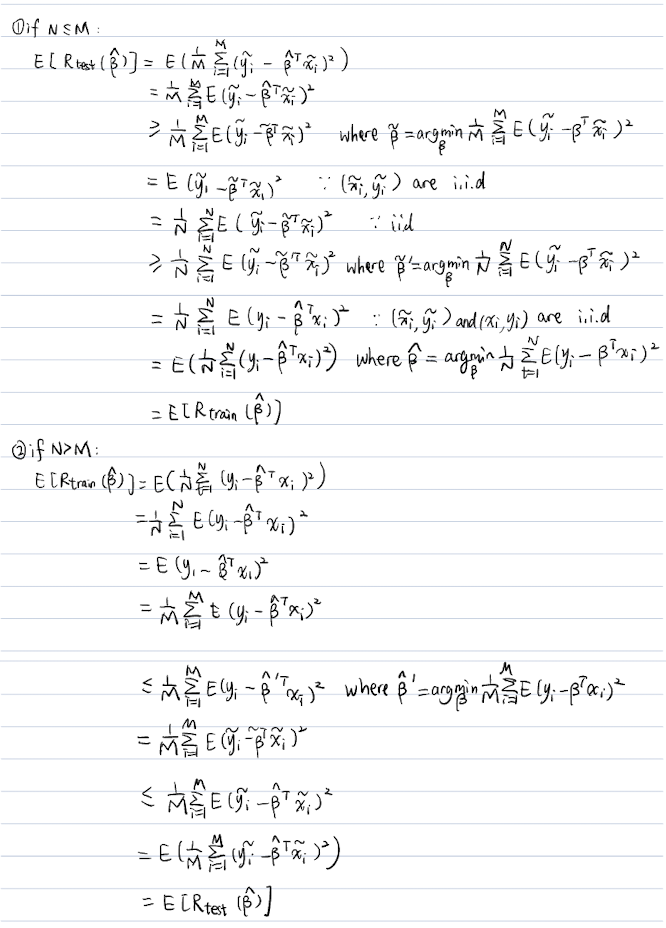